In [1]:
import jieba, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("score_3.csv")
content = df['content'].head(1000).dropna()

In [3]:
with open('stopwords.txt') as f:
    stopwords = f.read().splitlines()

In [4]:
def tokenize(sentence):
    without_duplicates = re.sub(r'(.)\1+', r'\1\1', sentence)
    without_punctuation = re.sub(r'[^\w]', '', without_duplicates)
    return jieba.lcut(without_punctuation)

In [5]:
vectorizer = TfidfVectorizer(stop_words=stopwords, tokenizer=jieba.lcut)
X = vectorizer.fit_transform(content)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/kf/czq3bwv96k7__xcnjrbpf33c0000gp/T/jieba.cache
Loading model cost 0.899 seconds.
Prefix dict has been built succesfully.
/Users/kgd/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [24]:
print(content[2])

这酒店价格高，无所谓但酒店房间很多灰尘。还有水龙头也是坏的，叫吧台换房间，吧台的人很没有礼貌的没有回答，房间没有像携程说的4.6分。房间里又没有信号连4G都上不了，被子一拍还有很多灰尘飘出来我也真的醉了。
我从来没有给过这么差评的酒店。
#卫生差#


In [7]:
print(X[3:4])

  (0, 1310)	0.1881518938081117
  (0, 953)	0.19845673925952148
  (0, 1440)	0.09381010473445758
  (0, 223)	0.3432076926885098
  (0, 659)	0.1716038463442549
  (0, 769)	0.3036152911112978
  (0, 940)	0.25411694494353915
  (0, 564)	0.20433601287806233
  (0, 440)	0.2786038986426942
  (0, 948)	0.3036152911112978
  (0, 482)	0.2786038986426942
  (0, 778)	0.2786038986426942
  (0, 1368)	0.3036152911112978
  (0, 94)	0.21810077543629663
  (0, 253)	0.2786038986426942
  (0, 1017)	0.16807799049908945


In [21]:
centers = range(20, 30)
models = [KMeans(n_clusters=i) for i in centers]
score = [models[i].fit(X).score(X) for i in range(len(models))]

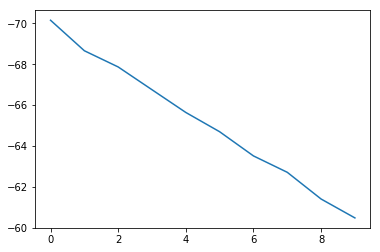

In [22]:
plt.gca().invert_yaxis()
plt.plot(score)

In [12]:
print(score)

[-91.30796658680167, -89.96139164108536, -88.79313840020815, -87.47805325812494, -86.41830013205143, -84.99733303387471, -83.89055497771714, -82.59768063631086]


In [ ]:
plt.plot(-score)

In [ ]:
print("Top terms per cluster:")
order_centroids = km[14].cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("X")
    top_ten_words = [terms[ind] for ind in order_centroids[i, :15]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

In [ ]:
[terms[ind] for ind in order_centroids[0, :15]]

In [ ]:
[terms[i] for i in order_centroids[:5].flatten()]

In [ ]:
# myfont = FontProperties(size=12,fname=)

def drawWordcloud(words):
    my_wordcloud = WordCloud(font_path='SimHei.ttf').generate(words)
    plt.imshow(my_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

drawWordcloud()